In [17]:
# Constants
DATA_PATH = "test_perform.txt"
VIS_DATA_PATH = "test_perform_long.txt"

In [2]:
# Packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
long_tests = pd.read_csv(VIS_DATA_PATH)
long_tests.head()

,id,name,value,test
0,1,zero,64.270000,0
1,1,one,65.950884,1
2,1,two,69.865513,2
3,1,three,70.071844,3
4,1,four,71.557456,4


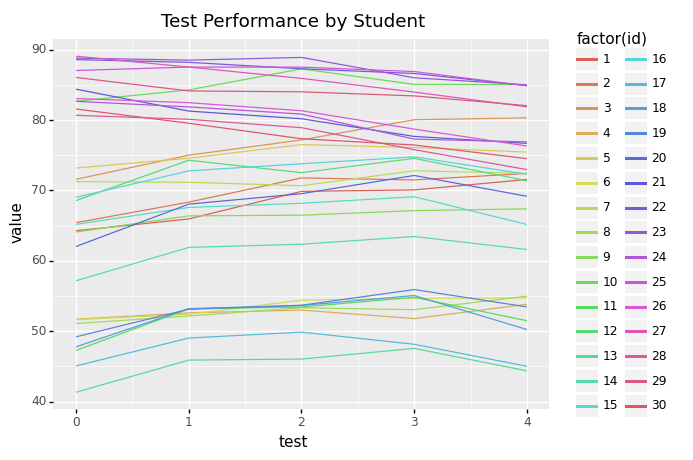

<ggplot: (191732404962)>

In [21]:
(ggplot(long_tests, aes(x='test', y='value', color='factor(id)'))+
geom_line() +
ggtitle('Test Performance by Student'))

In [12]:
raw_df = pd.read_csv(DATA_PATH)
raw_df.head()

,zero,one,two,three,four,id
0,64.27,65.950884,69.865513,70.071844,71.557456,1
1,65.42,68.334638,71.774954,71.488519,72.414197,2
2,71.58,75.002741,77.169056,80.038548,80.307990,3
3,51.71,52.610899,53.005482,51.800135,53.829034,4
4,73.18,74.575287,76.507547,76.102415,75.441424,5


In [23]:
features = ["zero", "one", "two", "three", "four"]

X = raw_df[features]

---
**Dendrogram**

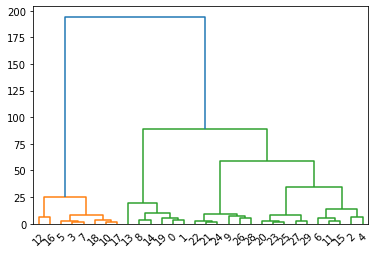

In [70]:
dendro = sch.dendrogram(sch.linkage(X, method='ward'))

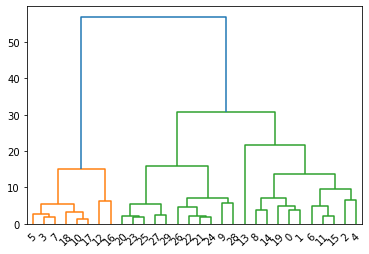

In [69]:
dendro = sch.dendrogram(sch.linkage(X, method='average'))

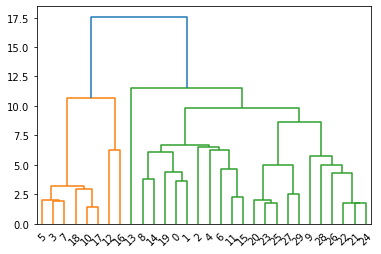

In [43]:
dendro = sch.dendrogram(sch.linkage(X, method='single'))

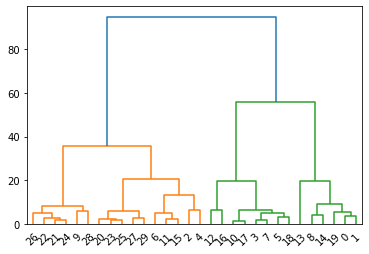

In [44]:
dendro = sch.dendrogram(sch.linkage(X, method='complete'))

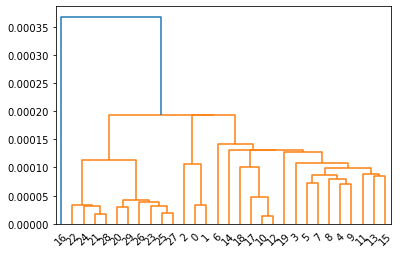

In [71]:
dendro = sch.dendrogram(sch.linkage(X, metric='cosine'))

---
**Agglomerative model**

In [24]:
hac = AgglomerativeClustering(affinity='euclidean',
                             linkage = 'ward')

hac.fit(X)

AgglomerativeClustering()

In [26]:
membership = hac.labels_
X['clustering'] = membership

In [27]:
silhouette_score(X[features], membership)

0.6429365563401733

___
**Another model specs**

In [65]:
hac = AgglomerativeClustering(n_clusters=5,
                              affinity='euclidean',
                              linkage = 'ward')

X = raw_df[features]
hac.fit(X)

AgglomerativeClustering(n_clusters=5)

In [66]:
membership = hac.labels_
X['clustering'] = membership

In [67]:
silhouette_score(X[features], membership)

0.5905830115868925